In [1]:
#1. Import Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2. Import Data
df = pd.read_csv("dataset/Customer Satisfaction and Sentiment Analysis.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#Menghapus kolom tidak diperlukan 
df = df.drop(columns=['Unnamed: 0'])

In [4]:
#3. Inspect Data
#3a. Menampilkan nama kolom
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
#3. Inspect Data
#3b. Untuk menampilkan type data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 100000 non-null  int64  
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Inflight wifi service              100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Ease of Online booking             100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Food and drink                     10000

In [6]:
#3. Inspect Data
#3c. mendeteksi kolom duplikasi
df.duplicated().sum()

np.int64(0)

In [7]:
#3. Inspect Data
#3e. Memisahkan kolom berdasarkan type data numerik dan kategorikal
categoricals  = df.select_dtypes(exclude = ["number"]).columns.tolist()
numerics = df.select_dtypes(include=["number"]).drop(columns=['id'], errors='ignore').columns.tolist()

In [8]:
#4. Describe Dataset
#4a. mendeskripsikan data numerik
df.describe().round(2)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99700.00
mean,64925.81,39.38,1190.59,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.19
std,37453.37,15.11,997.24,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.21,38.68
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32554.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64883.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97346.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [9]:
#4. Describe Dataset
#4b. mendeskripsikan data kategorikal
df.describe(include="object")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,100000,100000,100000,100000,100000
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,50714,81713,68977,47806,56665


In [10]:
#5. Cari Missing Value
#5a. Melihat missing value
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             300
satisfaction                           0
dtype: int64

In [11]:
#5. Missing Value
#5b. Menghapus missing value
df = df.dropna()
df.shape

(99700, 24)

In [12]:
#5. Missing Value
#5c. Mengecek kembali missing value
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

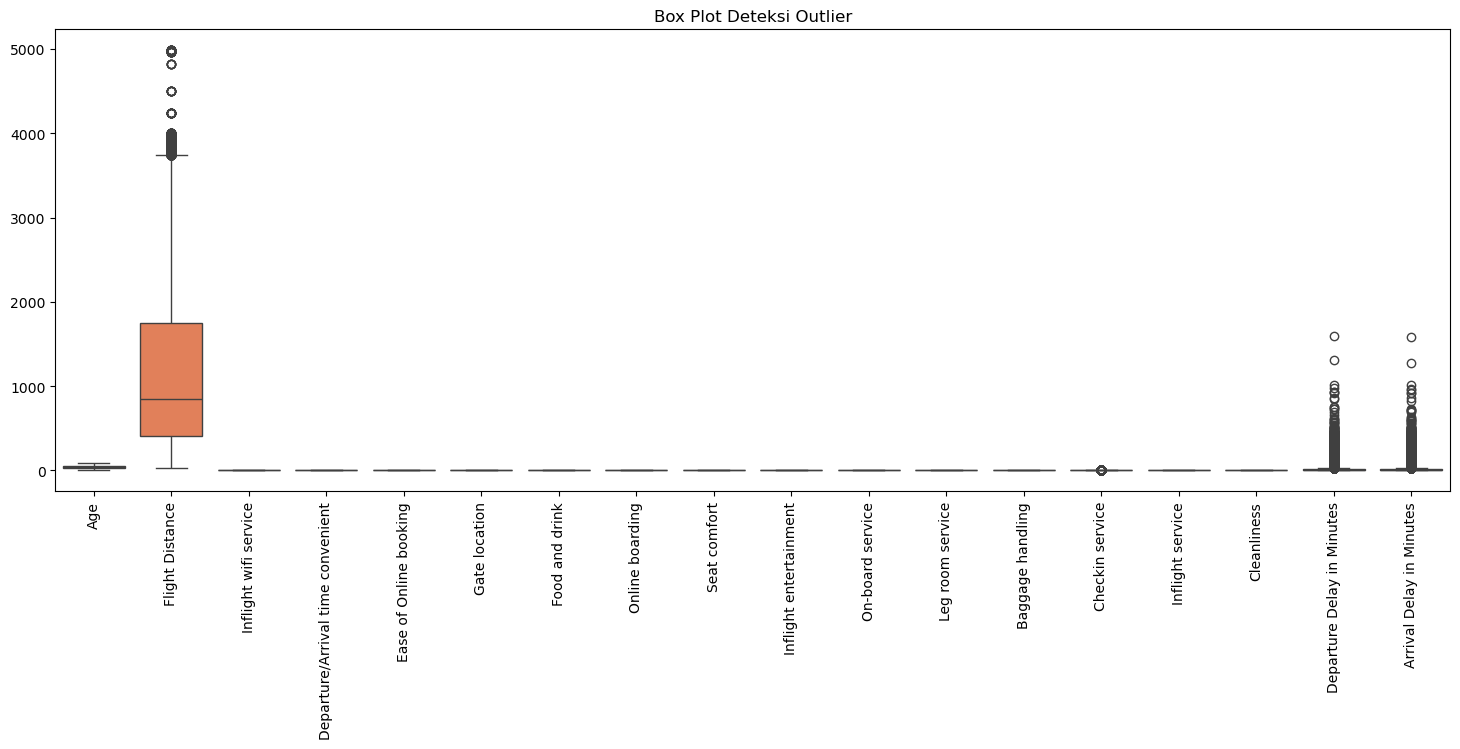

In [13]:
#6. Outlier
#6a. Melihat letak outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numerics])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=90)
plt.show()

In [14]:
# FEATURE ENGINEERING

# 1. Total Delay 
df["Total Delay"] = df["Departure Delay in Minutes"] + df["Arrival Delay in Minutes"].fillna(0)

# 2. Long Flight 
median_distance = df["Flight Distance"].median()
df["Long Flight"] = np.where(df["Flight Distance"] > median_distance, "Yes", "No")

# 3. Satisfied Flag 
df["Satisfied Flag"] = np.where(df["satisfaction"].str.lower() == "satisfied", 1, 0)

# 4. Delay Category 
df["Delay Category"] = pd.cut(
    df["Total Delay"],
    bins=[-1, 0, 30, 60, 180, 10000],
    labels=["No Delay", "Short Delay", "Medium Delay", "Long Delay", "Extreme Delay"]
)

# 5. Age Group
df["Age Group"] = pd.cut(
    df["Age"],
    bins=[0, 17, 30, 45, 60, 100],
    labels=["Teen", "Young Adult", "Adult", "Middle Age", "Senior"]
)

# 6. AVG Service Score 
service_cols = [
    "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]

df["Avg Service Score"] = df[service_cols].mean(axis=1).round(2)

In [15]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Long Flight,Satisfied Flag,Delay Category,Age Group,Avg Service Score
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,25,18.0,neutral or dissatisfied,43.0,No,0,Medium Delay,Teen,3.86
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,6.0,neutral or dissatisfied,7.0,No,0,Short Delay,Young Adult,2.29
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,0,0.0,satisfied,0.0,Yes,1,No Delay,Young Adult,3.71
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,11,9.0,neutral or dissatisfied,20.0,No,0,Short Delay,Young Adult,3.00
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,0,0.0,satisfied,0.0,No,1,No Delay,Senior,3.50


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99700 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 99700 non-null  int64   
 1   Gender                             99700 non-null  object  
 2   Customer Type                      99700 non-null  object  
 3   Age                                99700 non-null  int64   
 4   Type of Travel                     99700 non-null  object  
 5   Class                              99700 non-null  object  
 6   Flight Distance                    99700 non-null  int64   
 7   Inflight wifi service              99700 non-null  int64   
 8   Departure/Arrival time convenient  99700 non-null  int64   
 9   Ease of Online booking             99700 non-null  int64   
 10  Gate location                      99700 non-null  int64   
 11  Food and drink                     99700 non-n

In [17]:
kolom_float = ['Arrival Delay in Minutes', 'Total Delay', 'Avg Service Score']
df[kolom_float] = df[kolom_float].astype(int)

In [18]:
df.to_csv("dataset/Customer Satisfaction and Sentiment Analyst Cleaned.csv", index=False)